# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

# from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Data Preparation

In [3]:
# load the dataset; keep the top n words and zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words) # data comes already pre-processed

# subset the data for faster experiments
X_train = X_train[:5000]
y_train = y_train[:5000]

X_test = X_test[:1000]
y_test = y_test[:1000]

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape, X_test.shape)

(5000, 500) (1000, 500)


In [5]:
y_train[0], X_train[0]

(1,
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

# DNN Training

In [6]:
def build_model1():
    # create the model
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [7]:
model1 = build_model1()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4160501 (15.87 MB)
Trainable params: 4160501 (15.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model: use the test data as validation data for convenience
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
40/40 - 9s - loss: 0.6963 - accuracy: 0.5198 - val_loss: 0.6909 - val_accuracy: 0.5150 - 9s/epoch - 236ms/step
Epoch 2/2
40/40 - 5s - loss: 0.5627 - accuracy: 0.7430 - val_loss: 0.5570 - val_accuracy: 0.7170 - 5s/epoch - 131ms/step
Accuracy: 71.70%


In [9]:
def build_model2():
    # create the model
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [10]:
model2 = build_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_2 (Dense)             (None, 250)               4000250   
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4190451 (15.99 MB)
Trainable params: 419

In [11]:
# Train the model: use the test data as validation data for convenience
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
40/40 - 7s - loss: 0.6918 - accuracy: 0.5208 - val_loss: 0.6757 - val_accuracy: 0.5960 - 7s/epoch - 181ms/step
Epoch 2/2
40/40 - 5s - loss: 0.5186 - accuracy: 0.7272 - val_loss: 0.4456 - val_accuracy: 0.7910 - 5s/epoch - 131ms/step
Accuracy: 79.10%


In [12]:
model2 = build_model2()

# use test set as the validation set for this exercise
hist = model2.fit(X_train, y_train,
                 epochs=20, batch_size=128, verbose=0,
                 validation_data=(X_test, y_test))

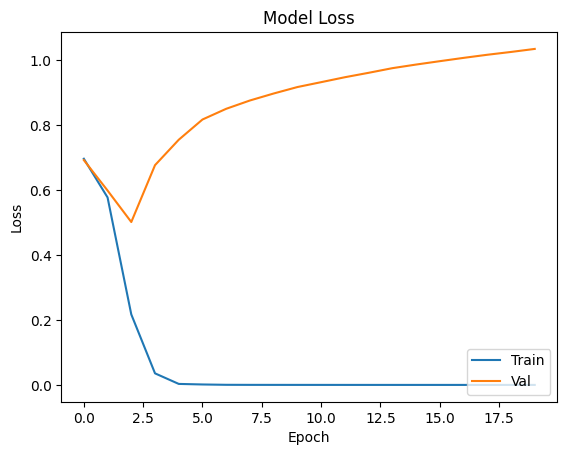

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
def build_model2_regularized():
    # create the model
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Flatten())
    model.add(Dense(250, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [15]:
model2_reg = build_model2_regularized()
model2_reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 flatten_3 (Flatten)         (None, 16000)             0         
                                                                 
 dense_10 (Dense)            (None, 250)               4000250   
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               25100     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 1)                

In [16]:
# Train the model: use the test data as validation data for convenience
hist = model2_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# evaluation of the model
scores = model2_reg.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
40/40 - 7s - loss: 0.8875 - accuracy: 0.5138 - val_loss: 0.7380 - val_accuracy: 0.5380 - 7s/epoch - 164ms/step
Epoch 2/2
40/40 - 4s - loss: 0.6822 - accuracy: 0.6420 - val_loss: 0.5580 - val_accuracy: 0.7750 - 4s/epoch - 102ms/step
Accuracy: 77.50%


In [17]:
# get the loss value at the last epoch
hist.history['loss'][-1]

0.6821855306625366

In [18]:
model2_reg = build_model2_regularized()

# use test set as the validation set for this exercise
hist = model2_reg.fit(X_train, y_train,
                 epochs=20, batch_size=128, verbose=0,
                 validation_data=(X_test, y_test))

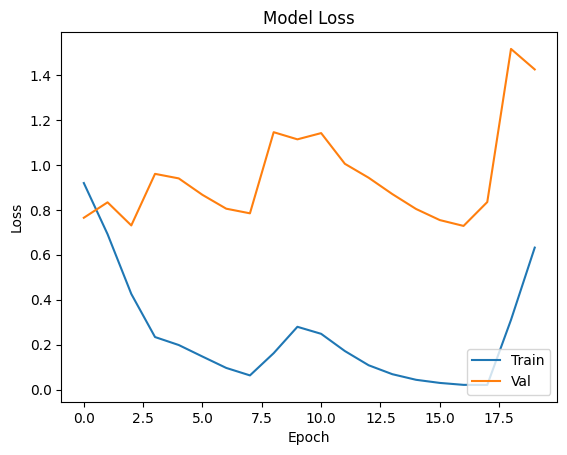

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# RNN Training

In [20]:
def build_RNN_model3():
    # create the model
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    # model.add(GRU(LSTM, return_sequences=True))  # RNN layer with 128 units
    model.add(Bidirectional(LSTM(32)))  # Another RNN layer, you can adjust the number of units
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [21]:
model3_rnn = build_RNN_model3()
model3_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 176705 (690.25 KB)
Trainable params: 176705 (690.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Train the model: use the test data as validation data for convenience
hist = model3_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# evaluation of the model
scores = model3_rnn.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
40/40 - 9s - loss: 0.6889 - accuracy: 0.5494 - val_loss: 0.6754 - val_accuracy: 0.5020 - 9s/epoch - 234ms/step
Epoch 2/2
40/40 - 4s - loss: 0.5643 - accuracy: 0.7304 - val_loss: 0.4435 - val_accuracy: 0.8200 - 4s/epoch - 109ms/step
Accuracy: 82.00%


# Test with a raw text

In [23]:
def format_text(raw_string):
    # Load the word index
    word_index = imdb.get_word_index()

    # Convert words to integers
    test_words = raw_string.lower().split()
    test_integers = [word_index.get(word, 0) for word in test_words if word_index.get(word, 0) < 5000]

    # Pad sequence
    test_input = sequence.pad_sequences([test_integers], maxlen=500)

    return test_input

In [24]:
# positive review instance
test_instance1 = ''' in one of my many videos i have attained from the local library , casablanca was my third classic in some weeks .
the others being citizen kane and vertigo ( yes , i am trying to see as many of afi's greatest movies ever made as i can ) .
but , casablanca stood out from the rest for me : it was actually watchable .
what most hail as the greatest american film ever , casablanca isn't so much a love story as a political frenzy with a love triangle thrown in .
it seems that star humphry bogart spend about 85 percent of the movie with various leaders of the nation instead of with ingred bergman .
that annoyed me , as did the ending .
why didn't the plan turn around ? ! ?
surprisingly , i enjoyed the film .
i liked bogart's character and his acting ( not over the top as most actors in his era ) .
i once read about if you had a choice to be in a movie , which one would it be , and a women said casablanca .
at first i was thinking to myself " why ? "
then , as i watched the film again , i understood why .
the movie is very well done and the script top-notch , although i doubt i understood more than half of the political mumbo jumbo .
casablanca is , in my mind , no classic ( like solaris ) , but it is a good film and stylishly shot .
hey , hollywood , how about this : a remake with harrison ford and anne heche ?
now that would be a classic .
'''
test_instance1

' in one of my many videos i have attained from the local library , casablanca was my third classic in some weeks . \nthe others being citizen kane and vertigo ( yes , i am trying to see as many of afi\'s greatest movies ever made as i can ) . \nbut , casablanca stood out from the rest for me : it was actually watchable . \nwhat most hail as the greatest american film ever , casablanca isn\'t so much a love story as a political frenzy with a love triangle thrown in . \nit seems that star humphry bogart spend about 85 percent of the movie with various leaders of the nation instead of with ingred bergman . \nthat annoyed me , as did the ending . \nwhy didn\'t the plan turn around ? ! ? \nsurprisingly , i enjoyed the film . \ni liked bogart\'s character and his acting ( not over the top as most actors in his era ) . \ni once read about if you had a choice to be in a movie , which one would it be , and a women said casablanca . \nat first i was thinking to myself " why ? " \nthen , as i wa

In [25]:
# positive review instance
test_instance2 = '''
well , i'll admit when i first heard about this film ( which was before dante's peak ) i could just smell what 'twister' had started .
so now it seems that we're in a full fledged return to the '70's disaster film era .
with 'twister' , 'dante's peak' , 'volcano' and soon 'flood' and james cameron's extremly expensive 'titanic'
i'll say first off i enjoyed 'volcano' much more than i did 'dantes peak' .
part of that is just being biased as i usually enjoy anything that tommy lee jones appears in .
i've been reading a lot about the movie being 'cheezy' or 'hokey' and really didn't see or think that once during the entire film .
i get bored easily and this film didn't bore me for a minute .
another thing , and boy am i bitching today ! , that bothers me is when critics and such go on about " well thats not really possible . "
you know what ?
i couldn't give a bloody damn if it's possible or not , really i couldn't .
it's a freaking movie and i don't want reality thrown in my face .
i want to be able to see the impossible , the all might " what if " to many reviewers have seen one to many movies !
the special effects are the second star to this feature .
they are so amazing that i found it hard sometimes to believe they were indeed fx and la was was not burning to the ground .
they did an incredible job and come oscar time ( if they remember ) some notice better be thrown there way . '''

test_instance2

'\nwell , i\'ll admit when i first heard about this film ( which was before dante\'s peak ) i could just smell what \'twister\' had started . \nso now it seems that we\'re in a full fledged return to the \'70\'s disaster film era . \nwith \'twister\' , \'dante\'s peak\' , \'volcano\' and soon \'flood\' and james cameron\'s extremly expensive \'titanic\' \ni\'ll say first off i enjoyed \'volcano\' much more than i did \'dantes peak\' . \npart of that is just being biased as i usually enjoy anything that tommy lee jones appears in . \ni\'ve been reading a lot about the movie being \'cheezy\' or \'hokey\' and really didn\'t see or think that once during the entire film . \ni get bored easily and this film didn\'t bore me for a minute . \nanother thing , and boy am i bitching today ! , that bothers me is when critics and such go on about " well thats not really possible . " \nyou know what ? \ni couldn\'t give a bloody damn if it\'s possible or not , really i couldn\'t . \nit\'s a freaking

In [26]:
test_input1 = format_text(test_instance1)
print(test_input1)

# Prediction
prediction = model2.predict(test_input1)
probability = prediction[0][0]

# Print the probability
print("Prediction probability:", probability)


1641221/1641221 [==============================] - 1s 1us/step
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

In [27]:
test_input2 = format_text(test_instance2)
print(test_input2)

# Prediction
prediction = model2.predict(test_input2)
probability = prediction[0][0]

# Print the probability
print("Prediction probability:", probability)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

# Building word_index from scratch for a given text dataset and other text processing tips
 - E.g., if you do not have access to the word_index = imdb.get_word_index()

In [28]:
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

In [29]:
tokens1 = clean_doc(test_instance1)
tokens2 = clean_doc(test_instance2)
# print(tokens1)

# Example training data (replace with your actual training texts)
# train_texts = ["example text one", "example text two", "another text example"]
train_texts = [tokens1] + [tokens2]

In [30]:
### creating word index from raw text

# Step 1: Tokenize the text
# words = [word for text in train_texts for word in text.lower().split()]
words = [word for text in train_texts for word in text]

# Step 2: Build a frequency dictionary
word_counts = Counter(words)

# Step 3: Create the word index (starting from index 1)
vocab_size = 5000  # For instance, top 5000 words
word_index = {word: index+1 for index, (word, _) in enumerate(word_counts.most_common(vocab_size))}

# Include a token for unknown words
word_index["<UNK>"] = len(word_index) + 1
print("word_index", word_index)

# Function to convert text to integers
def text_to_integers(text):
    return [word_index.get(word, word_index["<UNK>"]) for word in text.lower().split()]

# Convert your test instance
test_instance = "good film, well done"
test_integers = text_to_integers(test_instance)

# Padding
max_words = 10 # e.g., usually 500
test_input = np.array([test_integers])
test_padded = sequence.pad_sequences(test_input, maxlen=max_words)
print("test_padded:\n", test_padded)

word_index {'film': 1, 'casablanca': 2, 'movie': 3, 'many': 4, 'one': 5, 'classic': 6, 'see': 7, 'thrown': 8, 'didnt': 9, 'first': 10, 'well': 11, 'dantes': 12, 'peak': 13, 'really': 14, 'greatest': 15, 'movies': 16, 'ever': 17, 'much': 18, 'love': 19, 'political': 20, 'seems': 21, 'star': 22, 'enjoyed': 23, 'era': 24, 'would': 25, 'understood': 26, 'ill': 27, 'twister': 28, 'volcano': 29, 'possible': 30, 'couldnt': 31, 'want': 32, 'videos': 33, 'attained': 34, 'local': 35, 'library': 36, 'third': 37, 'weeks': 38, 'others': 39, 'citizen': 40, 'kane': 41, 'vertigo': 42, 'yes': 43, 'trying': 44, 'afis': 45, 'made': 46, 'stood': 47, 'rest': 48, 'actually': 49, 'watchable': 50, 'hail': 51, 'american': 52, 'isnt': 53, 'story': 54, 'frenzy': 55, 'triangle': 56, 'humphry': 57, 'bogart': 58, 'spend': 59, 'percent': 60, 'various': 61, 'leaders': 62, 'nation': 63, 'instead': 64, 'ingred': 65, 'bergman': 66, 'annoyed': 67, 'ending': 68, 'plan': 69, 'turn': 70, 'around': 71, 'surprisingly': 72, 'l

In [31]:
### preprocessing text data using tokenizer

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_texts)
print("train_texts[0]:\n", train_texts[0][:5])
print("train_texts[1]:\n", train_texts[1][:5])

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_texts)
print("encoded_docs[0]:\n", encoded_docs[0][:5])
print("encoded_docs[1]:\n", encoded_docs[1][:5])

# you can directly use the below as your training data
Xtrain_new = pad_sequences(encoded_docs, maxlen=500, padding='post')
print("Xtrain_new[0]:\n", Xtrain_new[0][:5])

# Convert your test instance
test_instance = "good film, well done"
tokens_test = clean_doc(test_instance)
print("tokens_test:\n", tokens_test)

# sequence encode
encoded_test = tokenizer.texts_to_sequences([tokens_test])
print("encoded_test:\n", encoded_test)

# pad sequences
max_words = 10
encoded_test_padded = pad_sequences(encoded_test, maxlen=max_words, padding='pre')
print("encoded_test_padded:\n", encoded_test_padded)

train_texts[0]:
 ['one', 'many', 'videos', 'attained', 'local']
train_texts[1]:
 ['well', 'ill', 'admit', 'first', 'heard']
encoded_docs[0]:
 [5, 4, 33, 34, 35]
encoded_docs[1]:
 [11, 27, 106, 10, 107]
Xtrain_new[0]:
 [ 5  4 33 34 35]
tokens_test:
 ['good', 'film', 'well', 'done']
encoded_test:
 [[96, 1, 11, 85]]
encoded_test_padded:
 [[ 0  0  0  0  0  0 96  1 11 85]]
